In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [4]:
type(housing)

sklearn.utils._bunch.Bunch

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
#lets check the description of the data 
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Preparing the data

In [7]:
df=pd.DataFrame(housing.data,columns=housing.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['price']=housing.target

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
#it describes the statistics of data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
#to handle the missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [13]:
#data analysis co relation
#It is highly important in linear regression that  is while dealing with numerical values
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [14]:
import seaborn as sns
sns.pairplot(df)

ModuleNotFoundError: No module named 'seaborn'

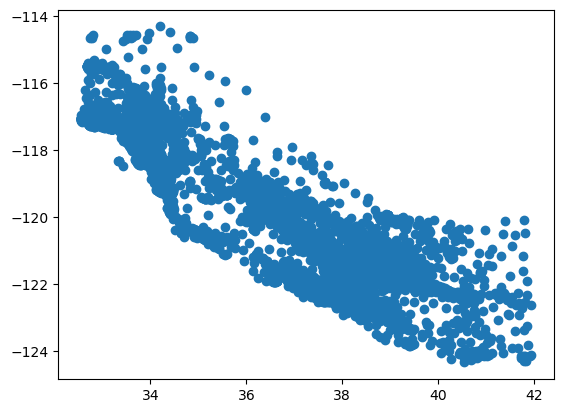

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['Latitude'],df['Longitude'])
plt.show()

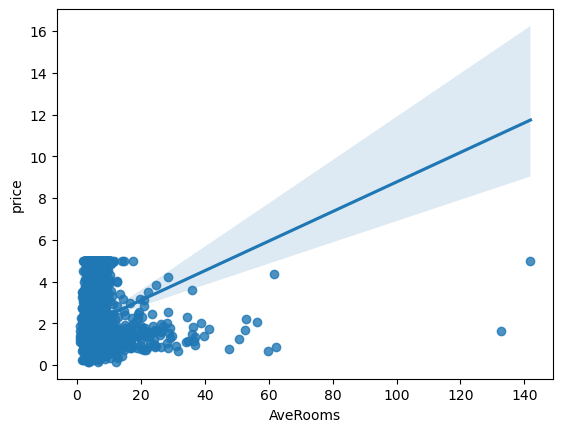

In [16]:

sns.regplot(x="AveRooms",y="price",data=df)
plt.show()

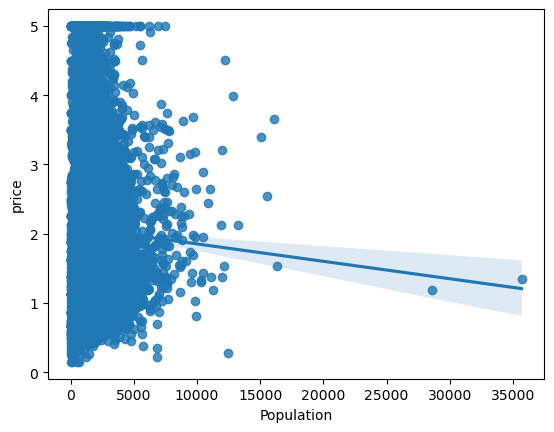

In [17]:
sns.regplot(x="Population",y='price',data=df)
plt.show()

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
x_train=scaler.fit_transform(x_train)

In [21]:
x_test=scaler.transform(x_test)

In [23]:
import pickle 
pickle.dump(scaler,open('scaler_model','wb'))
scaler=pickle.load(open('scaler_model','rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'scaler_model'

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
#on which params it has been trained
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
#Predict
y_pred=model.predict(x_test)

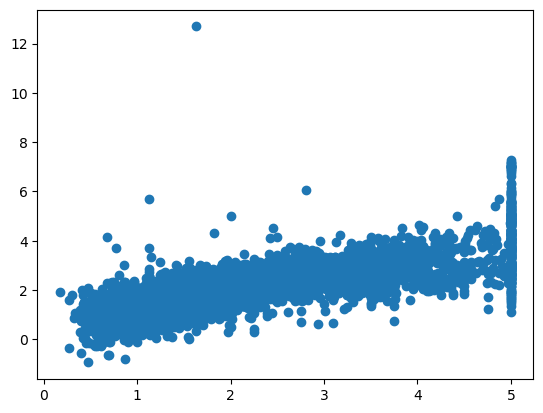

In [29]:
#scatter plot the prediction and the true value
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()

In [30]:
#residuals are the errors
residuals=y_test-y_pred

In [31]:
residuals

9491    -0.700690
11843    0.868365
11271    0.172193
19219    0.079586
14356   -0.484065
           ...   
10112    0.080882
19029   -0.827739
11085   -0.251389
16200   -0.661272
17598    0.178357
Name: price, Length: 6192, dtype: float64

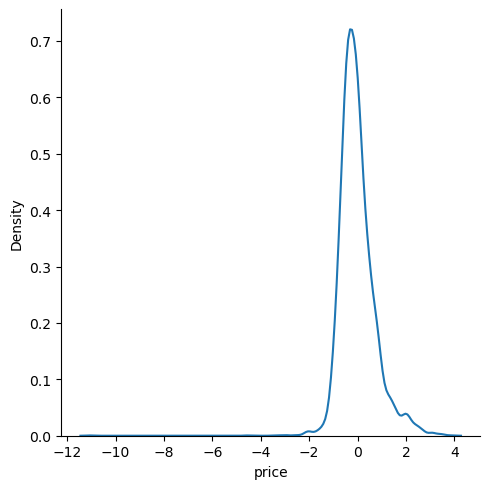

In [32]:
#plotting the residuals
sns.displot(residuals,kind='kde')
plt.show()

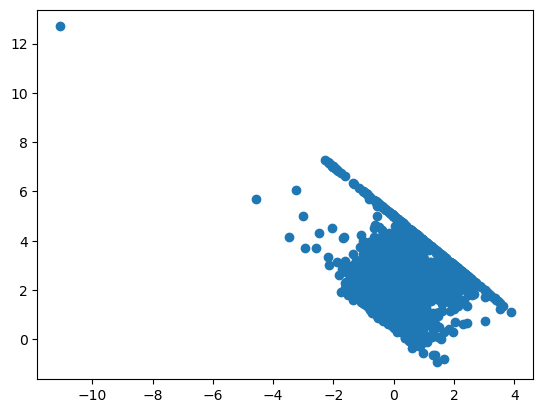

In [33]:
plt.scatter(residuals,y_pred)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


0.532350264208318
0.5289794623195643


In [35]:
# #R square and Adjusted Rsquare
# r2=1-ssr/sst ssr sum of the squares and sst some of the residuals
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.591006471966246


In [39]:
#adjusted R square no libraries are there so we have to implement them directly(1-(1-r2)*(n-1)/(n-k-1))
1-((1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.5904772873917239

# New Data Prediction

In [43]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [44]:
# transformation of new data
scaler.transform(housing.data[0].reshape(1,-1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.34997279,  0.98676924,  0.65370179, -0.16732734, -0.95852087,
        -0.04580229,  1.0616632 , -1.33431911]])

In [45]:
model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.16816714])

In [47]:
housing.target


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [48]:
#Pickling the model for deployment
import pickle

In [49]:
pickle.dump(model,open('house_pred.pkl','wb'))
pickle_model=pickle.load(open('house_pred.pkl','rb'))


In [50]:
pickle_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.16816714])